In [70]:
import pandas as pd

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
from sklearn.linear_model import LogisticRegression 

In [73]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
data = pd.read_csv('hrea.csv')

In [76]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [77]:
x = data_encoded.drop(columns=['Attrition_Yes'])
y = data_encoded['Attrition_Yes']

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [79]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train, y_train)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [80]:
y_pred = log_reg.predict(x_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [82]:
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8673
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       247
           1       0.90      0.19      0.32        47

    accuracy                           0.87       294
   macro avg       0.88      0.59      0.62       294
weighted avg       0.87      0.87      0.83       294



In [83]:
feature_importance = pd.Series(log_reg.coef_[0], index = x.columns).sort_values(ascending=False)

In [84]:
print('Top 10 Features Contributing to Attrition:')
print(feature_importance.head(10))
print('\nTop 10 Features Contributing to Retention:')
print(feature_importance.tail(10))

Top 10 Features Contributing to Attrition:
OverTime_Yes                        0.241162
YearsSinceLastPromotion             0.227866
NumCompaniesWorked                  0.202009
MaritalStatus_Single                0.140856
BusinessTravel_Travel_Frequently    0.110387
Department_Sales                    0.093734
JobRole_Laboratory Technician       0.075397
JobRole_Sales Representative        0.051434
EducationField_Marketing            0.044376
JobRole_Sales Executive             0.039335
dtype: float64

Top 10 Features Contributing to Retention:
TrainingTimesLastYear               -0.091324
Department_Research & Development   -0.102023
RelationshipSatisfaction            -0.107006
WorkLifeBalance                     -0.128004
YearsInCurrentRole                  -0.136423
YearsWithCurrManager                -0.152563
JobInvolvement                      -0.177215
JobSatisfaction                     -0.217147
StockOptionLevel                    -0.234400
EnvironmentSatisfaction           

In [85]:
import matplotlib.pyplot as plt

In [86]:
import seaborn as sns

In [87]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [88]:
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8673
Confusion Matrix:
[[246   1]
 [ 38   9]]


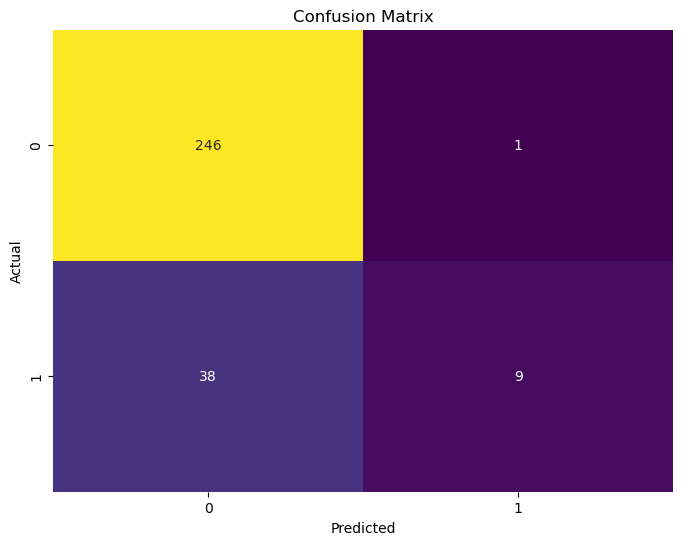

In [89]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [90]:
importance = log_reg.coef_[0]
features = x.columns
feature_importance = pd.DataFrame({'Feature':features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

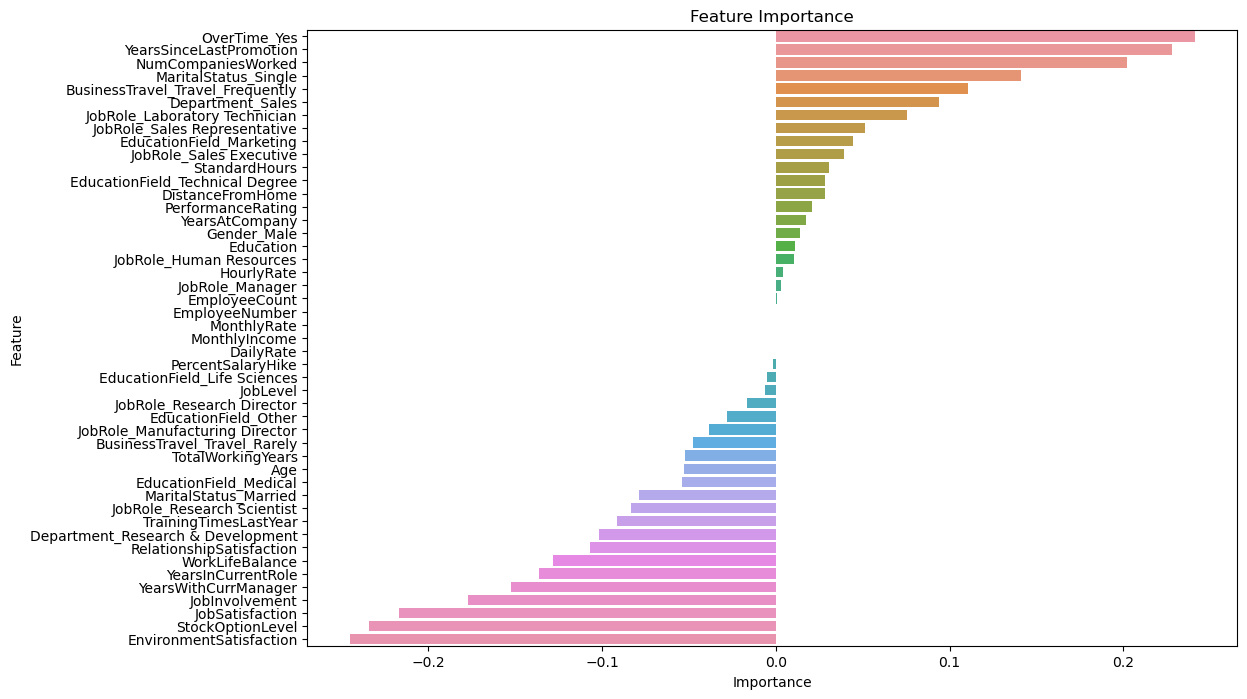

In [91]:
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data = feature_importance)
plt.title('Feature Importance')
plt.show()